## IS53051A: Machine Learning (2022-23) Coursework




**Team Lead: Sandor Kanda**  Student ID:  
**Team Member:Carlos Alves** Student ID:                  


Potential improvements of the ML modelling
After a cycle of data preprocessing and model training/ tuning, the Machine Learning engineer / analyst can return at different stages of the ML process to make improvements if needed, and redo the process.

For instance: (a) Dropping some features which have close to 0 correlations with the outcome. (b) And/or choosing the best features - with the highest importance from the random forest model.

These operations are called Feature selection. Feature selection is very useful especially when the dataset has a large number of variables (not the case here), or we use algos that are sensitive to features which are not predictive, as it is the case of k-Nearest Neighbour.

## I. Data inspection and visualisation

In [136]:
%matplotlib inline

### a. Loading the data and  Renaming Columns (for better readibility)

In [137]:
import pandas as pd

# load the dataset
dataset = pd.read_csv('datcw_na.csv')
# change the column names to actual variable names
dataset = dataset.rename(columns={ 'X0': 'Category of the Building',
                         'X1': 'Relative Compactness',
                         'X2': 'Surface Area',
                         'X3': 'Wall Area',
                         'X4': 'Roof Area',
                         'X5': 'Overall Height',
                         'X6': 'Orientation',
                         'X7': 'Glazing Area',
                         'X8': 'Glazing Area Distribution',
                         'Y':  'Heating Load'})

### b. Inspecting the data structure

In [138]:
dataset

,Category of the Building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.00,0.00,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.00,0.00,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.00,0.00,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.00,0.00,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.00,0.00,20.84
...,...,...,...,...,...,...,...,...,...,...
763,C3,0.52,948.64,277.83,218.30,4.24,4.95,0.48,4.05,17.88
764,C2,0.50,727.65,NaN,266.80,3.47,1.98,0.44,5.00,16.54
765,C1,0.68,889.35,404.25,178.60,3.47,2.43,0.40,4.95,16.44
766,C3,0.50,654.88,363.82,218.30,3.15,3.96,0.36,4.50,16.48


### Retriving further information about the dataset (i.e.: empty values, datatypes)

In [139]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category of the Building   768 non-null    object 
 1   Relative Compactness       768 non-null    float64
 2   Surface Area               768 non-null    float64
 3   Wall Area                  728 non-null    float64
 4   Roof Area                  768 non-null    float64
 5   Overall Height             768 non-null    float64
 6   Orientation                768 non-null    float64
 7   Glazing Area               768 non-null    float64
 8   Glazing Area Distribution  768 non-null    float64
 9   Heating Load               768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


### A summary of the central tendency, dispersion, and shape of the distribution of a dataset, including count, mean, standard deviation, minimum and maximum values, quartiles, and percentiles.

In [140]:
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


#### It is noticable, that "Category of the Building" is a categorical variable, and the datatype is object, opposed to the rest of the columns: float64

In [141]:
dataset["Category of the Building"].value_counts()

C2    265
C3    260
C1    243
Name: Category of the Building, dtype: int64

### c. Visualising the data

#### Histogram of the full data frame

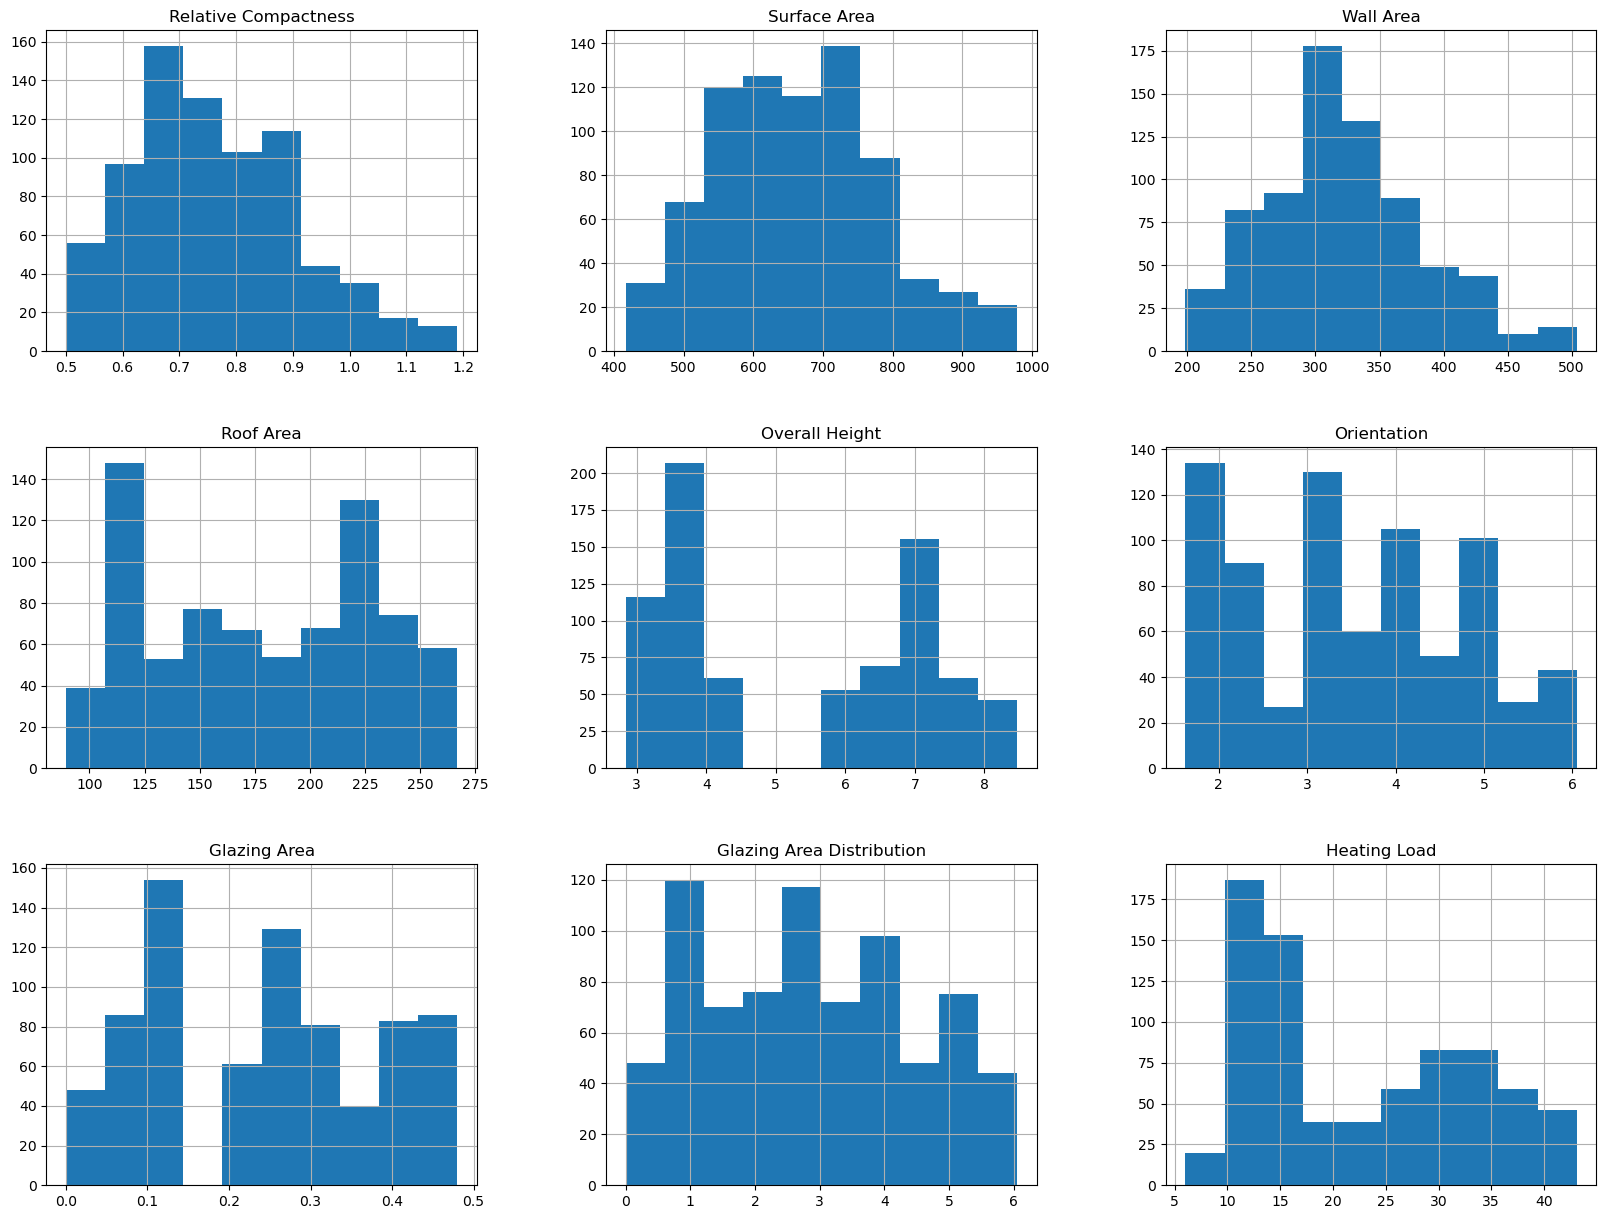

In [142]:
import matplotlib.pyplot as plt
dataset.hist(bins=10, figsize=(20,15))
plt.show()

### Histogram Interpretation

Column                          Histogram Type
______________________________________________

1.  Relative Compactness        Skew Right
2.  Surface Area           
3.  Wall Area                
4.  Roof Area                   Non-Symmetric Bimodal Distribution 
5.  Overall Height              Non-Symmetric Bimodal Distribution            
6.  Orientation               
7.  Glazing Area               
8.  Glazing Area Distribution  
9. Heating Load       

<AxesSubplot: >

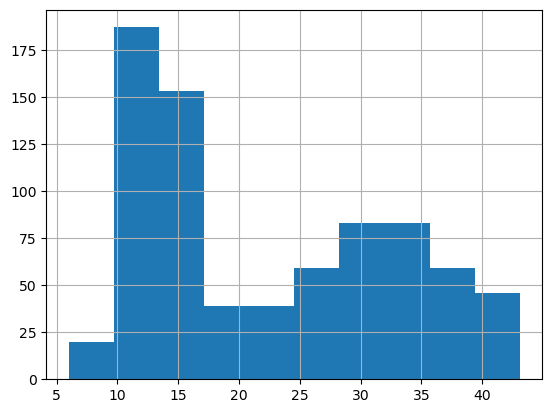

In [143]:
dataset['Heating Load'].hist()

#### Scattered Matrix of the full data frame

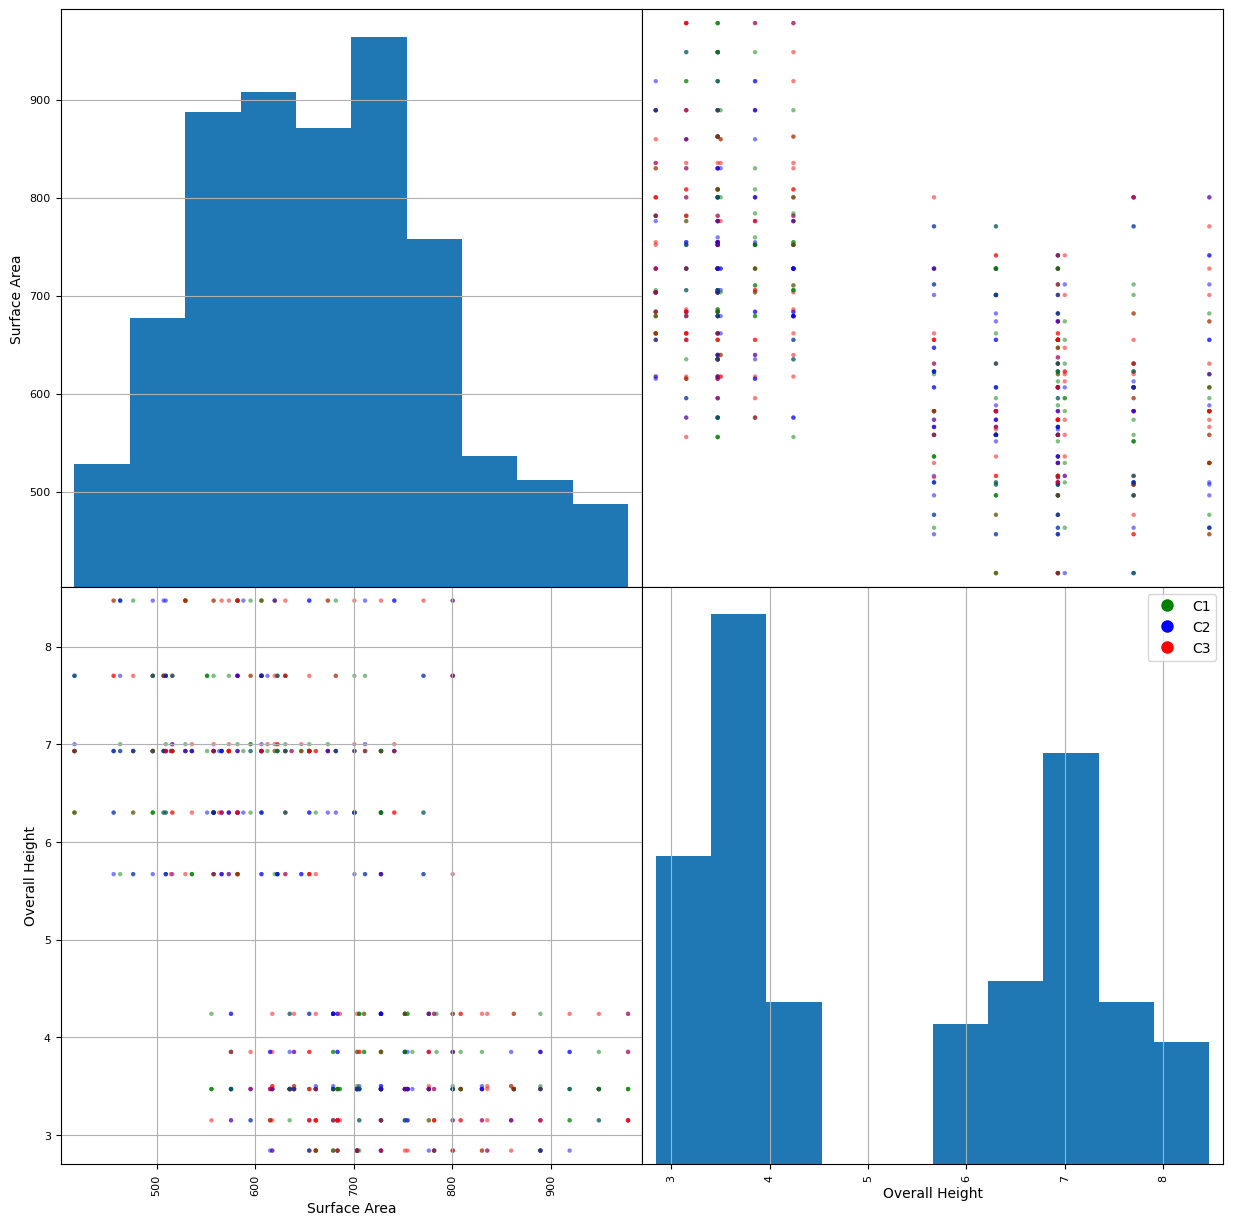

In [144]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt

# "Overall Height", "Glazing Area","Glazing Area Distribution", "Orientation",
attributes = ["Surface Area", "Overall Height", "Category of the Building"]

# select the attributes and map the stage colors
X = dataset[attributes]
cm = {'C1': 'green', 'C2': 'blue', 'C3': 'red'}
colors = X['Category of the Building'].map(cm)

# create a numpy array of RGBA color tuples for each data point
rgba_colors = [to_rgba(c) for c in colors]

# create a scatter matrix with smaller font size and smaller dots
plt.rcParams.update({'font.size': 10})
scatter_matrix(X, figsize=(15, 15), color=rgba_colors, s=40, grid=True)

# create a legend based on the colors and categories
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                          markerfacecolor=value, markersize=10) for key, value in cm.items()]

plt.legend(handles=legend_elements, loc='upper right')
# add grid to each subplot
for ax in plt.gcf().axes:
    ax.grid(True)
    
plt.show()


array([[<AxesSubplot: title={'center': 'Overall Height'}>,
        <AxesSubplot: title={'center': 'Heating Load'}>]], dtype=object)

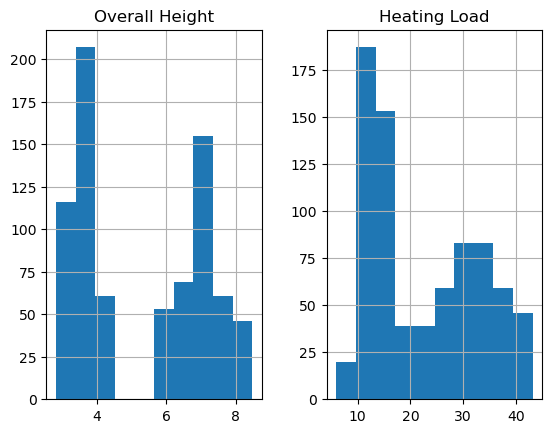

In [145]:
dataset[['Overall Height', 'Heating Load']].hist()


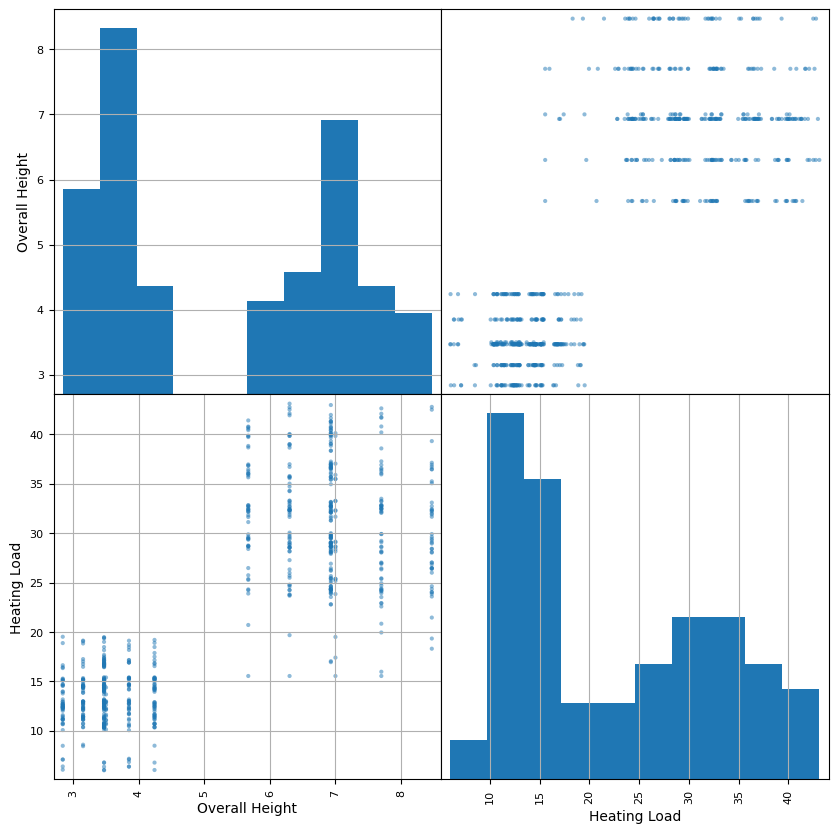

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

axes = scatter_matrix(dataset[['Overall Height', 'Heating Load']], figsize=(10, 10), diagonal='hist')

# Add grids to each subplot
for ax in axes.flatten():
    ax.grid()

# Show the plot
plt.show()


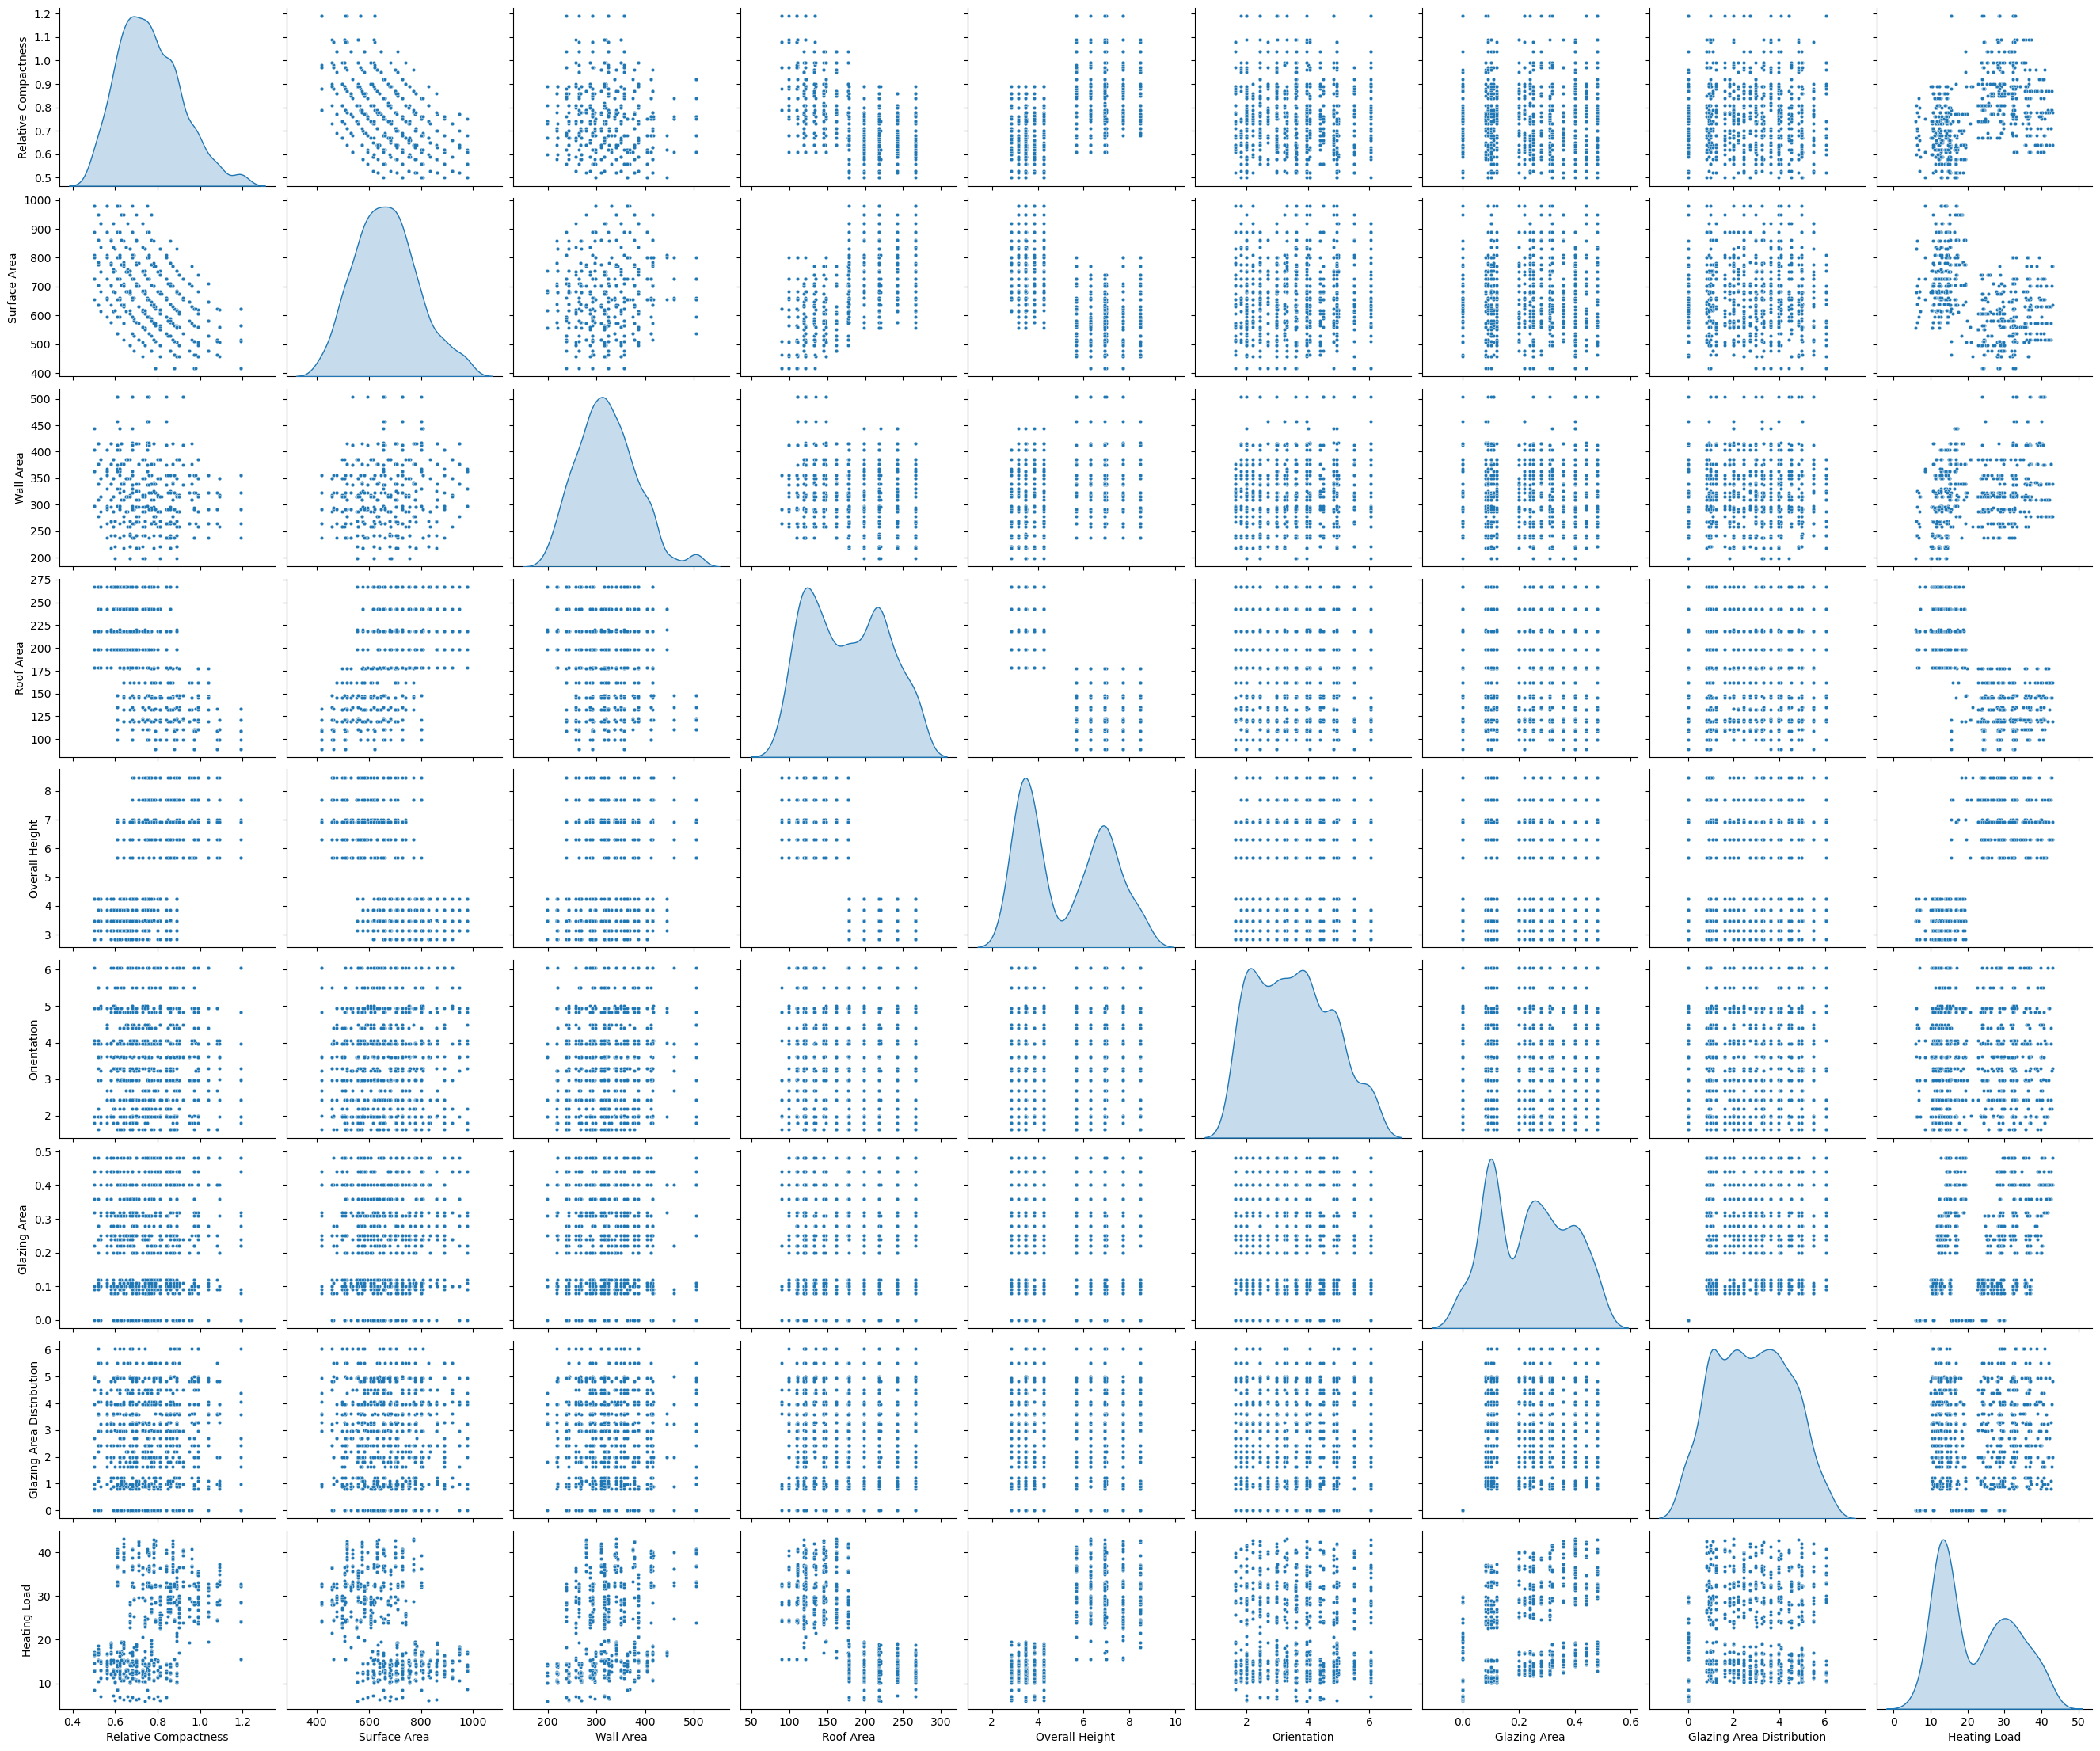

In [147]:
import seaborn as sns

sns.pairplot(dataset, height=2.5, aspect=1.2, diag_kind='kde', plot_kws=dict(s=10), diag_kws=dict(fill=True))

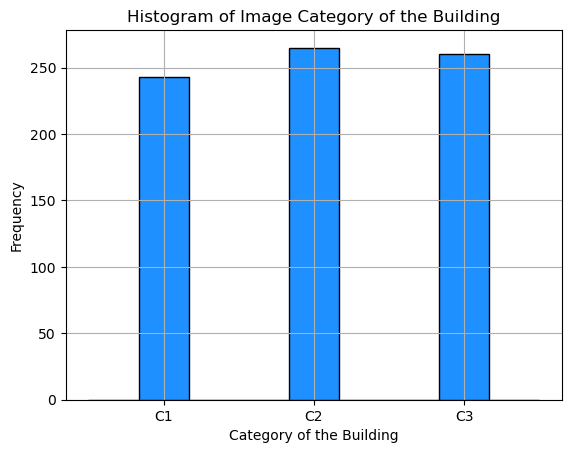

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the order of the categories
category_order = ['C1', 'C2', 'C3']

# Group the data by category
groups = dataset.groupby('Category of the Building')

# Create a histogram for each category in the specified order
for category in category_order:
    group = groups.get_group(category)
    plt.hist(group['Category of the Building'], bins=3, color='dodgerblue', edgecolor='black', label=category)

# Add grids to the plot
plt.grid(True)

# Add labels and a title to the plot
plt.xlabel('Category of the Building')
plt.ylabel('Frequency')
plt.title('Histogram of Image Category of the Building')



# Show the plot
plt.show()


## II. Data pre-processing

### a. Creating Test Set

In [149]:
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

In [150]:
# split the data into train and test sets, for model training and evaluation, respectively
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

### c. Looking For Correlations

In [151]:
correlationMatrix = dataset.corr()
print(correlationMatrix.columns)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load'],
      dtype='object')


/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_9256/879598923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = dataset.corr()


In [152]:
correlationMatrix["Heating Load"].sort_values(ascending=False)

Heating Load                 1.000000
Overall Height               0.815769
Relative Compactness         0.454177
Wall Area                    0.312449
Glazing Area                 0.255901
Glazing Area Distribution    0.087106
Orientation                  0.001340
Surface Area                -0.481192
Roof Area                   -0.771040
Name: Heating Load, dtype: float64

#### Looking to compare the strenghts of the correlation with the absolute values instead

In [153]:
correlationMatrix = abs(correlationMatrix["Heating Load"])
correlationMatrix_sorted = correlationMatrix.sort_values(ascending=False)
print(correlationMatrix_sorted)


Heating Load                 1.000000
Overall Height               0.815769
Roof Area                    0.771040
Surface Area                 0.481192
Relative Compactness         0.454177
Wall Area                    0.312449
Glazing Area                 0.255901
Glazing Area Distribution    0.087106
Orientation                  0.001340
Name: Heating Load, dtype: float64


### Worth dropping Glazing Area Distribution and/or Orientation due to the most minimal correlation values.        

In [154]:
dataset = train_set.drop(columns=["Heating Load", "Glazing Area Distribution", "Orientation"])
dataset_labels = train_set["Heating Load"].copy()


### Data Cleaning

### c. Missing Values

In [155]:
# Checking the data with missing values.
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head() 
sample_incomplete_rows


,Category of the Building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
608,C1,0.68,808.50,NaN,266.80,3.85,0.36
432,C1,1.19,622.55,NaN,109.15,5.67,0.22
395,C1,0.69,476.28,NaN,145.53,6.93,0.22
333,C1,0.68,727.65,NaN,242.55,3.47,0.20
417,C1,0.84,727.65,NaN,266.80,3.85,0.25


In [156]:
missing_values= dataset.isnull().sum()
print(missing_values)

Category of the Building     0
Relative Compactness         0
Surface Area                 0
Wall Area                   29
Roof Area                    0
Overall Height               0
Glazing Area                 0
dtype: int64


How to justify why median is a good way to go about this?

Computing median and impute (fill in with median) the missing values.

In [157]:
median = dataset["Wall Area"].median()
sample_incomplete_rows["Wall Area"].fillna(median, inplace=True)

In [158]:
sample_incomplete_rows

,Category of the Building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
608,C1,0.68,808.50,315.32,266.80,3.85,0.36
432,C1,1.19,622.55,315.32,109.15,5.67,0.22
395,C1,0.69,476.28,315.32,145.53,6.93,0.22
333,C1,0.68,727.65,315.32,242.55,3.47,0.20
417,C1,0.84,727.65,315.32,266.80,3.85,0.25


In [159]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [160]:
dataset_num = dataset.drop("Category of the Building", axis=1)

In [161]:
imputer.fit(dataset_num)

SimpleImputer(strategy='median')

In [162]:
X = imputer.transform(dataset_num)

In [163]:
dataset_tr = pd.DataFrame(X, columns=dataset_num.columns,index=dataset.index)

In [164]:
dataset_tr.loc[sample_incomplete_rows.index.values]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
608,0.68,808.50,315.32,266.80,3.85,0.36
432,1.19,622.55,315.32,109.15,5.67,0.22
395,0.69,476.28,315.32,145.53,6.93,0.22
333,0.68,727.65,315.32,242.55,3.47,0.20
417,0.84,727.65,315.32,266.80,3.85,0.25


In [165]:
imputer.strategy

'median'

In [166]:
dataset_tr.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
60,0.81,496.12,286.65,145.53,7.70,0.09
618,0.64,635.04,339.57,266.80,4.24,0.32
346,0.69,582.12,264.60,161.70,8.47,0.25
294,0.73,681.84,385.39,121.28,7.70,0.24
231,0.66,683.55,315.32,198.45,3.15,0.11


### d. Handling Categorical Atributes

In [167]:
dataset_Categorical = dataset[["Category of the Building"]]
dataset_Categorical.head()

,Category of the Building
60,C1
618,C1
346,C1
294,C1
231,C3


Justify why One-Hot Encoding is suitable here

### Using One-Hot Encoding, as the categorical values are not ordinal.

In [168]:
from sklearn.preprocessing import OneHotEncoder

category_encoder = OneHotEncoder()
dataset_Categorical_1Hot = category_encoder.fit_transform(dataset_Categorical)
dataset_Categorical_1Hot

<614x3 sparse matrix of type '<class 'numpy.float64'>'
	with 614 stored elements in Compressed Sparse Row format>

In [169]:
dataset_Categorical_1Hot.shape

(614, 3)

In [170]:
dataset_Categorical_1Hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Transformation Pipeline

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

dataset_num_tr = num_pipeline.fit_transform(dataset_num)

In [172]:
dataset_num_tr

array([[ 0.32633614, -1.40887782, -0.58523907, -0.63358631,  1.35456446,
        -1.05722443],
       [-0.81710012, -0.26910413,  0.31254773,  1.77454909, -0.51898102,
         0.57913281],
       [-0.48079534, -0.70328801, -0.95931691, -0.31248835,  1.77150955,
         0.08111104],
       ...,
       [ 0.66264092, -0.75751997,  0.08402943,  1.29300144, -0.93592612,
        -0.84378653],
       [ 1.40251144, -1.30024981,  0.58687147, -1.35600707,  0.93761937,
         0.50798684],
       [ 1.53703336, -0.90232997, -1.07162508, -1.33416367,  0.59648247,
        -1.1283704 ]])

In [173]:
from sklearn.compose import ColumnTransformer
import pandas as pd

num_attribs = list(dataset_num)
cat_attribs = ["Category of the Building"]
y_train = train_set['Heating Load']
train_set.drop('Heating Load',inplace=True, axis=1)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_dataset_prepared = full_pipeline.fit_transform(train_set)

# III. Models training and optimisation

# a. Simple Linear Regression

In [174]:
# fitting a simple linear regression to predict Heating Load

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_dataset_prepared, y_train) 
#lin_reg.fit(train_dataset_prepared, dataset_labels)lin_reg.fit(train_dataset_prepared, y_train)  # Use the correct variable for training labels

LinearRegression()

### Test set or evaluate the Linear Regression model

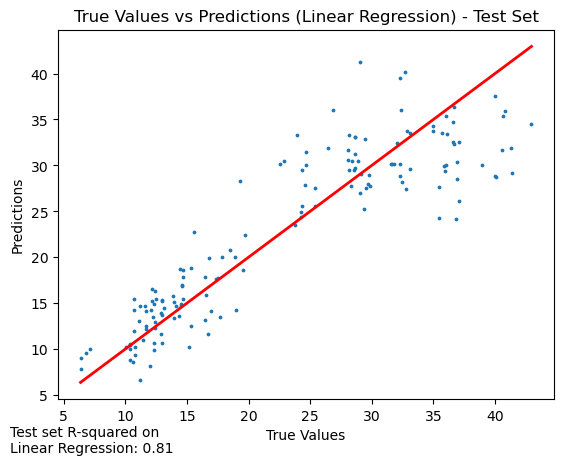

In [175]:
import matplotlib.pyplot as plt

# Prepare the test set
y_test = test_set["Heating Load"].copy()
test_set.drop("Heating Load", inplace=True, axis=1)
test_dataset_prepared = full_pipeline.transform(test_set)

# Make predictions on the test set
test_predictions = lin_reg.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = lin_reg.score(test_dataset_prepared, y_test)

# Scatter plot of true values vs predictions for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Linear Regression) - Test Set")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.text(0.05, 0, f"Test set R-squared on\nLinear Regression: {test_accuracy:.2f}", fontsize=10, transform=plt.gcf().transFigure)
plt.show()

In [176]:
from sklearn.metrics import r2_score

# R-squared scores
train_r2 = r2_score(y_train, lin_reg.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.2f}")
print(f"Test set R-squared: {test_r2:.2f}")


Training set R-squared: 0.80
Test set R-squared: 0.81


### Mean Squared Error on Linear Regression

In [177]:
from sklearn.metrics import mean_absolute_error

# MAE scores
train_mae = mean_absolute_error(y_train, lin_reg.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

from sklearn.metrics import mean_squared_error

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, lin_reg.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 3.422862604092428
Test MAE: 3.3503146493588787
Training RMSE: 4.495910826359876
Test RMSE: 4.469985214480717


### Linear Regression - Cross Validation

In [178]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

In [179]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, train_dataset_prepared, dataset_labels,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)


Scores: [4.30177996 4.40345334 4.4300656  4.61221467 5.03339283 4.86738729
 4.13772397 4.81422842 5.27281989 3.65560218]
Mean: 4.552866814886814
Standard deviation: 0.4469753250935862


### Linear Regression Fine-Tune

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Linear Regression
param_grid = [
    {'linear_regression__fit_intercept': [True, False]}
]

# Create the Linear Regression model inside a pipeline
lin_reg_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(lin_reg_pipeline, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('linear_regression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'linear_regression__fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [181]:
# Get the best parameters
grid_search.best_params_


{'linear_regression__fit_intercept': True}

In [182]:
# Get the best Linear Regression model
grid_search.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [183]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.593999536959192 {'linear_regression__fit_intercept': True}
22.620510514936687 {'linear_regression__fit_intercept': False}


In [184]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linear_regression__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006308,0.001645,0.001059,0.000107,True,{'linear_regression__fit_intercept': True},-19.978993,-20.128038,-23.881120,-20.640018,...,-21.104832,1.427521,1,-20.506665,-20.298908,-19.346916,-20.235807,-20.186973,-20.115054,0.399237
1,0.006136,0.003010,0.003447,0.004971,False,{'linear_regression__fit_intercept': False},-525.196030,-500.893998,-540.505422,-499.332384,...,-511.687496,18.165306,2,-506.003462,-514.944591,-506.130703,-507.378244,-520.408382,-510.973076,5.759625


### System Evaluation on the Test Set- Linear Regression

In [185]:
final_model = grid_search.best_estimator_

X_test = test_set
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_LinReg_final_rmse = np.sqrt(final_mse)

In [186]:
_LinReg_final_rmse

4.469985214480718

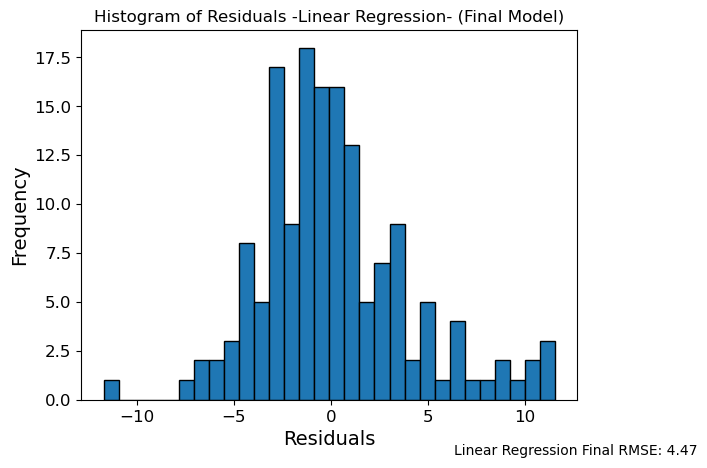

In [270]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Linear Regression- (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Linear Regression Final RMSE: {_LinReg_final_rmse:.2f}")

plt.show()


## c. Ridge Regression

In [188]:
from sklearn.linear_model import Ridge

# Fit the Ridge Regression model
ridge_reg = Ridge(alpha=10, solver="saga", random_state=42)
ridge_reg.fit(train_dataset_prepared, y_train)  # Use the correct variable for training labels

Ridge(alpha=10, random_state=42, solver='saga')

### Adding SGDRegressor because the penalty="l2" parameter is not in the Ridge regression block because Ridge regression inherently uses L2 regularization

In [189]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=1, random_state=42)
sgd_reg.fit(train_dataset_prepared, y_train.ravel())
sgd_reg.predict(train_dataset_prepared)

array([26.49989319, 17.78600279, 26.74995247, 29.36312679, 16.31576372,
       30.1462124 , 27.85392621, 27.13917192, 21.13119232, 16.13381637,
       19.48252302, 16.40933416, 27.76607593, 28.51496613, 27.65496988,
       16.81059369, 10.68839214, 26.85222634, 14.55497773, 31.73195982,
       17.97031329, 25.31074591, 16.61011138, 17.38853065, 27.91117723,
       28.42737021, 15.2083122 , 15.92456432, 29.9774077 , 17.02228768,
       28.07789623, 17.84056793, 27.94033161, 18.14872236, 18.83020964,
       26.06874569, 24.92734421, 20.8160948 , 30.40210207, 15.97778811,
       28.23903145, 25.11634228, 30.32528768, 15.92801641, 31.46300975,
       13.20743265, 19.3363258 , 28.41892004, 20.79474073, 26.89778112,
       14.81324226, 28.62753409, 24.99148181, 30.47895965, 26.42070295,
       15.51772145, 25.50218345, 17.9970383 , 19.32953126, 30.72089657,
       11.21373047, 15.0064614 , 27.75222311, 25.32898919, 29.3600922 ,
       14.61921026, 24.67585566, 14.4392631 , 28.41545084, 26.92

### Test set to evaluate the Ridge Regression model

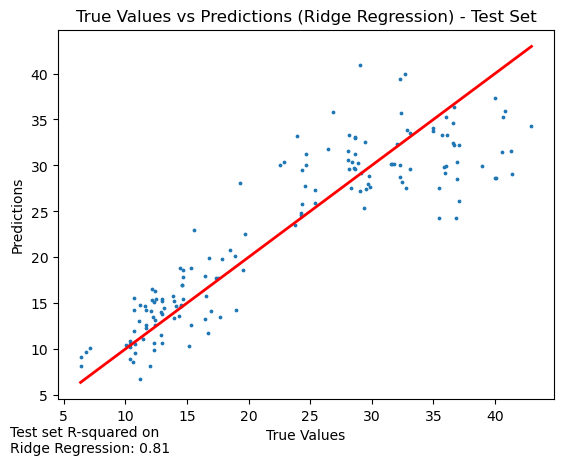

In [190]:
import matplotlib.pyplot as plt

# # Prepare the test set

# test_dataset = test_set.drop("Heating Load", axis=1)
# y_test = test_set["Heating Load"].copy()

test_predictions = ridge_reg.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = ridge_reg.score(test_dataset_prepared, y_test)


# test_dataset_prepared = full_pipeline.transform(test_dataset)

# # Make predictions on the test set
# test_predictions = ridge_reg.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = ridge_reg.score(test_dataset_prepared, y_test)

# Create a scatter plot comparing true values with predicted values for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Ridge Regression) - Test Set")

# Add a reference line for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Print the R-squared value (test set accuracy) at the bottom of the plot
plt.text(0.05, 0, f"Test set R-squared on\nRidge Regression: {test_accuracy:.2f}", fontsize=10, transform=plt.gcf().transFigure)


plt.show()

### Performance evaluation using R-squared - Ridge Regression

In [191]:
from sklearn.metrics import r2_score

# R-squared scores
train_r2 = r2_score(y_train, ridge_reg.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.2f}")
print(f"Test set R-squared: {test_r2:.2f}")

Training set R-squared: 0.80
Test set R-squared: 0.81


### Mean Square Error on Ridge Regression

In [192]:
from sklearn.metrics import mean_absolute_error

# MAE scores
train_mae = mean_absolute_error(y_train, ridge_reg.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

from sklearn.metrics import mean_squared_error

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, ridge_reg.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 3.4165489792315875
Test MAE: 3.3713197246707143
Training RMSE: 4.49782923390411
Test RMSE: 4.479451041682342


### Ridge Regression- Cross Validation

In [193]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

In [194]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Fit the Ridge Regression model
ridge_reg = Ridge(alpha=10, solver="saga", random_state=42)
ridge_reg.fit(train_dataset_prepared, y_train)

# Cross-validation for Ridge Regression
ridge_scores = cross_val_score(ridge_reg, train_dataset_prepared, y_train,
                               n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)

display_scores(ridge_rmse_scores)


Scores: [4.332639   4.42097298 4.39636576 4.63565634 5.06019049 4.85180053
 4.11846004 4.75981652 5.30116024 3.63531853]
Mean: 4.551238042499383
Standard deviation: 0.4557774065063965


In [276]:
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.model_selection import GridSearchCV

# Parameter grid for Ridge Regression
param_grid_ridge = [
    {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
]

# Parameter grid for SGDRegressor
param_grid_sgd = [
    {'penalty': ['l2', 'L1'], 'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [42]}
]

ridge_reg = Ridge(random_state=42)
sgd_reg = SGDRegressor()

# Grid search for Ridge Regression
grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5, n_jobs=-1,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True)
grid_search_ridge.fit(train_dataset_prepared, y_train.ravel())

# Grid search for SGDRegressor
grid_search_sgd = GridSearchCV(sgd_reg, param_grid_sgd, cv=5, n_jobs=-1,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
grid_search_sgd.fit(train_dataset_prepared, y_train.ravel())


/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1585, in fit
    self._validate_params()
  File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/base.py", line 570, in _validate_params
    val

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2', 'L1'], 'random_state': [42]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [277]:
# Get the best parameters
grid_search.best_params_


{'polynomialfeatures__degree': 3, 'ridge__alpha': 100, 'ridge__tol': 0.001}

In [197]:
# Get the best Linear Regression model
grid_search.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

#### Grid Search Results

In [198]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.593999536959192 {'linear_regression__fit_intercept': True}
22.620510514936687 {'linear_regression__fit_intercept': False}


In [199]:
# here are the cross validation results in full as a dataframe

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linear_regression__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006308,0.001645,0.001059,0.000107,True,{'linear_regression__fit_intercept': True},-19.978993,-20.128038,-23.881120,-20.640018,...,-21.104832,1.427521,1,-20.506665,-20.298908,-19.346916,-20.235807,-20.186973,-20.115054,0.399237
1,0.006136,0.003010,0.003447,0.004971,False,{'linear_regression__fit_intercept': False},-525.196030,-500.893998,-540.505422,-499.332384,...,-511.687496,18.165306,2,-506.003462,-514.944591,-506.130703,-507.378244,-520.408382,-510.973076,5.759625


In [200]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.593999536959192 {'linear_regression__fit_intercept': True}
22.620510514936687 {'linear_regression__fit_intercept': False}


### System Evaluation on the Test Set- Ridge Regression

In [201]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_RidgeReg_final_rmse = np.sqrt(final_mse)

In [202]:
_RidgeReg_final_rmse

4.469985214480718

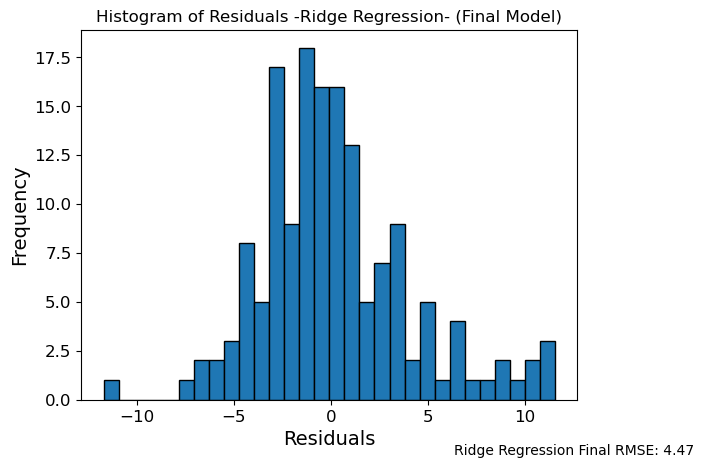

In [271]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Ridge Regression- (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Ridge Regression Final RMSE: {_RidgeReg_final_rmse:.2f}")

plt.show()

### Using Stochastic Gradient Descent

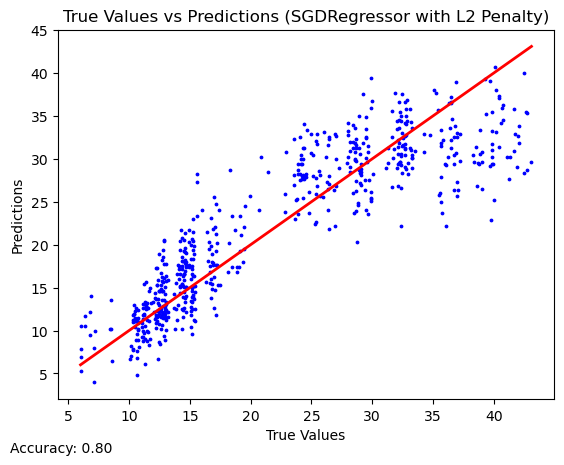

In [204]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import pandas as pd

sgd_reg = SGDRegressor(penalty="l2", alpha=0.01, random_state=42)
sgd_reg.fit(train_dataset_prepared, y_train.ravel())

predictions = sgd_reg.predict(train_dataset_prepared)

# Calculate accuracy using score() method
accuracy = sgd_reg.score(train_dataset_prepared, y_train)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, predictions, s=3, c='blue', label='Predictions')  # Set the marker size to a smaller value and color to blue

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (SGDRegressor with L2 Penalty)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

# Print accuracy at the bottom of the plot
plt.text(0.05, 0, f"Accuracy: {accuracy:.2f}", fontsize=10, transform=plt.gcf().transFigure)

plt.show()




## d. Lasso Regression

In [205]:
from sklearn.linear_model import Lasso

# Fit the Lasso Regression model
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(train_dataset_prepared, y_train)

Lasso(alpha=0.1, random_state=42)

In [206]:
# Here are the coefficient(s) of the Lasso model: 

lasso_reg.coef_

array([-0.        , -0.36891783,  1.61220976, -2.54068552,  5.62415503,
        2.68259874, -0.        , -0.        ,  0.        ])

In [207]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1, tol=1e-05, random_state=42)
sgd_reg.fit(train_dataset_prepared, y_train.ravel())
sgd_reg.predict(train_dataset_prepared)

array([27.99724993, 16.65420903, 31.66676934, 34.22190345, 12.47139518,
       32.95379969, 29.17143328, 31.56917322, 21.40602952, 12.46103798,
       18.49139889, 13.6601925 , 30.34832811, 32.31998055, 29.5191413 ,
       13.04749967,  6.80964916, 29.01019416, 11.47539832, 32.66374835,
       14.52308065, 27.72503382, 13.02928374, 16.46107442, 29.0201092 ,
       31.47195113, 10.53554229, 15.0544467 , 31.34075522, 15.13884707,
       30.92403621, 15.17599206, 26.62825507, 16.49294563, 16.59156404,
       28.8125225 , 23.72749409, 19.1170925 , 36.38412731, 11.93816634,
       31.58982737, 29.26247548, 31.09604811, 13.62351094, 31.29294292,
       10.18645983, 16.84769202, 30.56440854, 22.68020479, 28.9856984 ,
       10.88160174, 31.38316192, 24.94117297, 32.22734056, 27.2962212 ,
       13.70036807, 29.95243719, 17.29744526, 19.5910482 , 35.07287566,
        5.63610259, 12.47524088, 28.35186327, 25.27275379, 32.58851241,
       12.54714493, 23.06263112, 10.73982039, 28.01719256, 30.46

### Test set to evaluate the Lasso Regression model

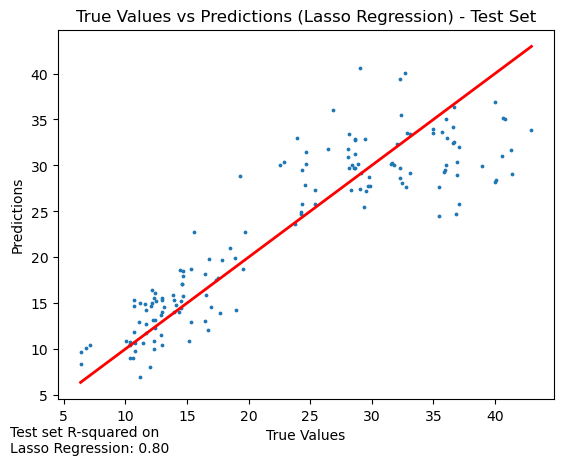

In [208]:
# Prepare the test set
# test_dataset = test_set.drop("Heating Load", axis=1)
# y_test = test_set["Heating Load"].copy()


test_predictions = lasso_reg.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = lasso_reg.score(test_dataset_prepared, y_test)

# Create a scatter plot comparing true values with predicted values for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Lasso Regression) - Test Set")

# Add a reference line for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Print the R-squared value (test set accuracy) at the bottom of the plot
plt.text(0.05, 0, f"Test set R-squared on\nLasso Regression: {test_accuracy:.2f}", fontsize=10, transform=plt.gcf().transFigure)


plt.show()

### Performance evaluation using R-squared - Lasso Regression

In [209]:
from sklearn.metrics import r2_score

# R-squared scores
train_r2 = r2_score(y_train, lasso_reg.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.2f}")
print(f"Test set R-squared: {test_r2:.2f}")



Training set R-squared: 0.80
Test set R-squared: 0.80


### Mean Square Error on Lasso Regression

In [210]:
from sklearn.metrics import mean_absolute_error

# MAE scores
train_mae = mean_absolute_error(y_train, lasso_reg.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

from sklearn.metrics import mean_squared_error

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, lasso_reg.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 3.4137579777857074
Test MAE: 3.4004703064330095
Training RMSE: 4.508099908643355
Test RMSE: 4.510276452641077


### Lasso Regression- Cross Validation

In [211]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

In [212]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Fit the Lasso Regression model
lasso_reg = Lasso(alpha=1, random_state=42)
lasso_reg.fit(train_dataset_prepared, y_train)

# Cross-validation for Lasso Regression
lasso_scores = cross_val_score(lasso_reg, train_dataset_prepared, y_train,
                               n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)

display_scores(lasso_rmse_scores)


Scores: [4.65783795 4.68332338 4.29318222 5.13066472 5.46314581 5.31460858
 4.50042256 4.75603523 5.80153417 3.66413811]
Mean: 4.826489273510163
Standard deviation: 0.5901293854602838


In [213]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso Regression
param_grid = [
    {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'tol': [1e-3, 1e-4, 1e-5]}
]

# Create the Lasso Regression model
lasso_reg = Lasso(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train)


GridSearchCV(cv=5, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'tol': [0.001, 0.0001, 1e-05]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [214]:
grid_search.best_params_

{'alpha': 0.1, 'tol': 0.0001}

In [215]:
grid_search.best_estimator_

Lasso(alpha=0.1, random_state=42)

### Grid Searh Results

In [216]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.593759103292331 {'alpha': 0.001, 'tol': 0.001}
4.59369996570009 {'alpha': 0.001, 'tol': 0.0001}
4.593697578932884 {'alpha': 0.001, 'tol': 1e-05}
4.5911056127216705 {'alpha': 0.01, 'tol': 0.001}
4.591094110002647 {'alpha': 0.01, 'tol': 0.0001}
4.591098929738384 {'alpha': 0.01, 'tol': 1e-05}
4.572981339297919 {'alpha': 0.1, 'tol': 0.001}
4.572883479324924 {'alpha': 0.1, 'tol': 0.0001}
4.572892577750332 {'alpha': 0.1, 'tol': 1e-05}
4.858815812565115 {'alpha': 1, 'tol': 0.001}
4.858926478232442 {'alpha': 1, 'tol': 0.0001}
4.85893824561314 {'alpha': 1, 'tol': 1e-05}
10.05273540517294 {'alpha': 10, 'tol': 0.001}
10.05273540517294 {'alpha': 10, 'tol': 0.0001}
10.05273540517294 {'alpha': 10, 'tol': 1e-05}
10.05273540517294 {'alpha': 100, 'tol': 0.001}
10.05273540517294 {'alpha': 100, 'tol': 0.0001}
10.05273540517294 {'alpha': 100, 'tol': 1e-05}


In [217]:
# here are the cross validation results in full as a dataframe

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_tol,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001940,0.000407,0.000579,0.000132,0.001,0.001,"{'alpha': 0.001, 'tol': 0.001}",-19.974437,-20.125742,-23.884709,...,-21.102623,1.430421,9,-20.506679,-20.298920,-19.346929,-20.235820,-20.186983,-20.115066,0.399237
1,0.002174,0.000324,0.000577,0.000060,0.001,0.0001,"{'alpha': 0.001, 'tol': 0.0001}",-19.974488,-20.125278,-23.883283,...,-21.102079,1.429983,8,-20.506679,-20.298921,-19.346930,-20.235821,-20.186982,-20.115067,0.399237
2,0.001612,0.000214,0.000507,0.000109,0.001,0.00001,"{'alpha': 0.001, 'tol': 1e-05}",-19.974476,-20.125211,-23.883272,...,-21.102057,1.429992,7,-20.506679,-20.298921,-19.346930,-20.235821,-20.186982,-20.115067,0.399237
3,0.001905,0.000199,0.000795,0.000235,0.01,0.001,"{'alpha': 0.01, 'tol': 0.001}",-19.931644,-20.099793,-23.904830,...,-21.078251,1.453297,6,-20.508073,-20.300255,-19.348401,-20.237231,-20.187972,-20.116386,0.399188
4,0.001663,0.000253,0.000624,0.000191,0.01,0.0001,"{'alpha': 0.01, 'tol': 0.0001}",-19.934173,-20.100017,-23.904403,...,-21.078145,1.452842,4,-20.508047,-20.300225,-19.348368,-20.237179,-20.187951,-20.116354,0.399189
5,0.001917,0.000160,0.000577,0.000083,0.01,0.00001,"{'alpha': 0.01, 'tol': 1e-05}",-19.934550,-20.100624,-23.904180,...,-21.078189,1.452636,5,-20.508037,-20.300218,-19.348359,-20.237174,-20.187945,-20.116347,0.399189
6,0.001750,0.000264,0.000619,0.000010,0.1,0.001,"{'alpha': 0.1, 'tol': 0.001}",-19.455813,-19.963026,-24.179604,...,-20.912158,1.702634,3,-20.632641,-20.424278,-19.416886,-20.373653,-20.267756,-20.223043,0.420199
7,0.001882,0.000078,0.000655,0.000108,0.1,0.0001,"{'alpha': 0.1, 'tol': 0.0001}",-19.466153,-19.958119,-24.179064,...,-20.911263,1.701626,1,-20.632045,-20.423578,-19.416134,-20.372589,-20.267334,-20.222336,0.420219
8,0.001652,0.000175,0.000584,0.000132,0.1,0.00001,"{'alpha': 0.1, 'tol': 1e-05}",-19.467281,-19.958384,-24.178969,...,-20.911347,1.701417,2,-20.631826,-20.423530,-19.416060,-20.372484,-20.267288,-20.222238,0.420192
9,0.002151,0.000330,0.000652,0.000114,1,0.001,"{'alpha': 1, 'tol': 0.001}",-22.209813,-22.182079,-28.799010,...,-23.608091,2.656743,10,-23.746378,-23.336658,-22.452587,-23.427144,-23.012010,-23.194955,0.438780


In [218]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.593759103292331 {'alpha': 0.001, 'tol': 0.001}
4.59369996570009 {'alpha': 0.001, 'tol': 0.0001}
4.593697578932884 {'alpha': 0.001, 'tol': 1e-05}
4.5911056127216705 {'alpha': 0.01, 'tol': 0.001}
4.591094110002647 {'alpha': 0.01, 'tol': 0.0001}
4.591098929738384 {'alpha': 0.01, 'tol': 1e-05}
4.572981339297919 {'alpha': 0.1, 'tol': 0.001}
4.572883479324924 {'alpha': 0.1, 'tol': 0.0001}
4.572892577750332 {'alpha': 0.1, 'tol': 1e-05}
4.858815812565115 {'alpha': 1, 'tol': 0.001}
4.858926478232442 {'alpha': 1, 'tol': 0.0001}
4.85893824561314 {'alpha': 1, 'tol': 1e-05}
10.05273540517294 {'alpha': 10, 'tol': 0.001}
10.05273540517294 {'alpha': 10, 'tol': 0.0001}
10.05273540517294 {'alpha': 10, 'tol': 1e-05}
10.05273540517294 {'alpha': 100, 'tol': 0.001}
10.05273540517294 {'alpha': 100, 'tol': 0.0001}
10.05273540517294 {'alpha': 100, 'tol': 1e-05}


In [219]:

grid_search.best_estimator_.coef_

array([-0.        , -0.36891783,  1.61220976, -2.54068552,  5.62415503,
        2.68259874, -0.        , -0.        ,  0.        ])

In [220]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_LassoReg_final_rmse = np.sqrt(final_mse)

In [221]:
_LassoReg_final_rmse

4.510276452641077

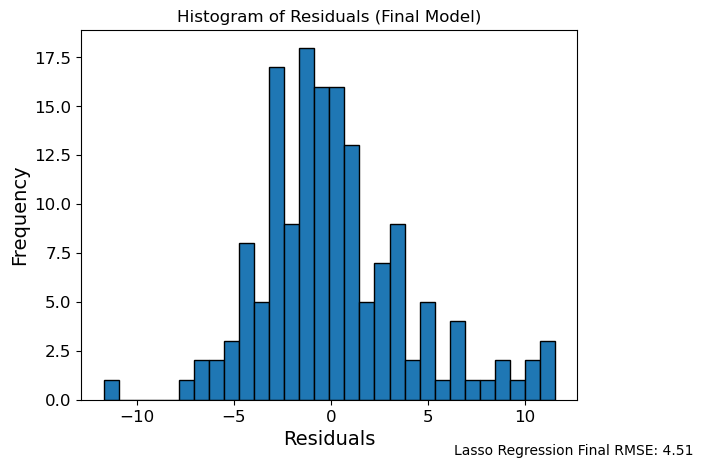

In [264]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Lasso Regression- (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Lasso Regression Final RMSE: {_LassoReg_final_rmse:.2f}")

plt.show()


## e. Elastic Net Regression

In [223]:
from sklearn.linear_model import ElasticNet

# Fit the ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=1, fit_intercept=True,
                         random_state=42, selection='cyclic')
elastic_net.fit(train_dataset_prepared, y_train)


ElasticNet(alpha=0.1, l1_ratio=1, random_state=42)

In [224]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# Create an instance of the SGDRegressor model with Elastic Net regularization
sgd_reg = SGDRegressor(penalty="elasticnet", 
                       alpha=0.1,
                       l1_ratio=0.5, 
                       max_iter=1000, 
                       tol=1e-4, 
                       warm_start=False, 
                       random_state=42)

# Fit the model to   training data
sgd_reg.fit(train_dataset_prepared, y_train.ravel())

# Generate predictions on   training data
sgd_reg.predict(train_dataset_prepared)


array([27.79265996, 16.62639542, 30.97733501, 33.74754736, 12.86613751,
       32.63167525, 29.22311035, 31.11863073, 21.48745845, 12.80278201,
       18.8127626 , 13.97265953, 30.02896093, 31.77957802, 29.43185977,
       13.50743877,  6.65863613, 28.99740766, 11.59929962, 32.78585233,
       14.90566985, 27.25342705, 13.14619066, 16.36989839, 28.89965215,
       31.21129639, 10.9942907 , 14.7817267 , 31.40307676, 15.2711085 ,
       30.8040924 , 15.27467221, 26.75009971, 16.62967319, 16.88645306,
       28.41965968, 24.11057203, 19.40090553, 35.74716117, 12.30901143,
       31.03187165, 28.7295566 , 31.20470449, 13.67789128, 31.46542829,
       10.07727159, 17.17374004, 30.50911974, 22.63700588, 28.95281303,
       11.2615716 , 31.21051593, 25.11666708, 31.88911666, 27.19645508,
       13.73491894, 29.40318097, 17.27695623, 19.66679477, 34.91872438,
        5.85367614, 12.66248974, 28.34604787, 25.37302721, 32.35579371,
       12.3076733 , 23.1241026 , 10.71248502, 28.07222293, 29.99

### Test set to evaluation Elastic Net 

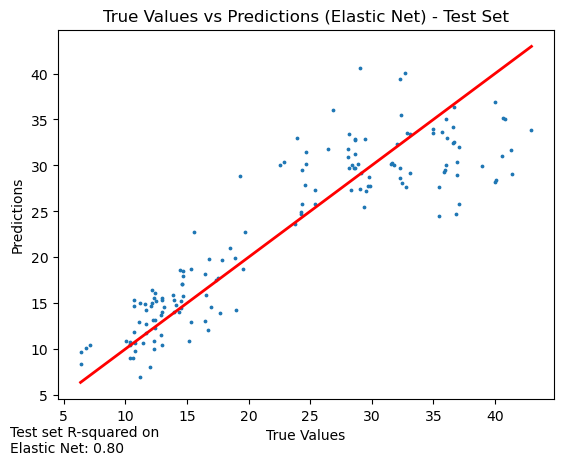

In [225]:
# Prepare the test set
test_predictions =elastic_net.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = elastic_net.score(test_dataset_prepared, y_test)

# Create a scatter plot comparing true values with predicted values for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Elastic Net) - Test Set")

# Add a reference line for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Print the R-squared value (test set accuracy) at the bottom of the plot
plt.text(0.05, 0, f"Test set R-squared on\nElastic Net: {test_accuracy:.2f}", fontsize=10, transform=plt.gcf().transFigure)

plt.show()


### Performance evaluation using R-squared - Elastic Net Regression

In [226]:
from sklearn.metrics import r2_score

# R-squared scores
train_r2 = r2_score(y_train, elastic_net.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.2f}")
print(f"Test set R-squared: {test_r2:.2f}")


Training set R-squared: 0.80
Test set R-squared: 0.80


### Mean Square Error on Elasti Net Regression

In [227]:
from sklearn.metrics import mean_absolute_error

# MAE scores
train_mae = mean_absolute_error(y_train, elastic_net.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

from sklearn.metrics import mean_squared_error

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, elastic_net.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 3.4137579777857074
Test MAE: 3.4004703064330095
Training RMSE: 4.508099908643355
Test RMSE: 4.510276452641077


### Elastic Net Cross Validation

In [228]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

In [229]:
from sklearn.model_selection import cross_val_score

# Fit the Lasso Regression model
elastic_net = ElasticNet(alpha=1, random_state=42)
elastic_net.fit(train_dataset_prepared, y_train)

# Cross-validation for Elastic Net Regression
elastic_net_scores = cross_val_score(elastic_net, train_dataset_prepared, y_train,
                               n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
elastic_net_rmse_scores = np.sqrt(-lasso_scores)

display_scores(elastic_net_rmse_scores)

Scores: [4.65783795 4.68332338 4.29318222 5.13066472 5.46314581 5.31460858
 4.50042256 4.75603523 5.80153417 3.66413811]
Mean: 4.826489273510163
Standard deviation: 0.5901293854602838


In [230]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ElasticNet
param_grid = [
    {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
        'max_iter': [1000],
        'tol': [1e-3, 1e-4, 1e-5],
        'warm_start': [False],
        'random_state': [42],
    }
]

# Create the ElasticNet model
elastic_net = ElasticNet()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train)


/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+03, tolerance: 4.917e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.996e+03, tolerance: 4.966e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                          'max_iter': [1000], 'random_state': [42],
                          'tol': [0.001, 0.0001, 1e-05],
                          'warm_start': [False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [231]:
grid_search.best_params_

{'alpha': 0.1,
 'l1_ratio': 1,
 'max_iter': 1000,
 'random_state': 42,
 'tol': 0.0001,
 'warm_start': False}

### Grid Search Results

In [232]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.593783703181299 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.593783703181299 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4.593783703181299 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 1e-05, 'warm_start': False}
4.593752085525034 {'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.593743311909634 {'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4.593737142960756 {'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 1000, 'random_state': 42, 'tol': 1e-05, 'warm_start': False}
4.593749886519456 {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.593723365665878 {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}


In [233]:

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_max_iter,param_random_state,param_tol,param_warm_start,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006188,0.000694,0.000625,0.000254,0.001,0,1000,42,0.001,False,...,-21.102849,1.429392,37,-20.506729,-20.298976,-19.346987,-20.235893,-20.187039,-20.115125,0.399236
1,0.005959,0.000565,0.000677,0.000045,0.001,0,1000,42,0.0001,False,...,-21.102849,1.429392,37,-20.506729,-20.298976,-19.346987,-20.235893,-20.187039,-20.115125,0.399236
2,0.005930,0.000794,0.000626,0.000129,0.001,0,1000,42,0.00001,False,...,-21.102849,1.429392,37,-20.506729,-20.298976,-19.346987,-20.235893,-20.187039,-20.115125,0.399236
3,0.002019,0.000407,0.000608,0.000141,0.001,0.25,1000,42,0.001,False,...,-21.102558,1.429762,35,-20.506708,-20.298952,-19.346962,-20.235862,-20.187013,-20.115099,0.399237
4,0.003066,0.000422,0.000695,0.000029,0.001,0.25,1000,42,0.0001,False,...,-21.102478,1.429809,32,-20.506708,-20.298953,-19.346962,-20.235862,-20.187013,-20.115100,0.399237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.002103,0.000251,0.001018,0.000384,100,0.75,1000,42,0.0001,False,...,-101.057489,6.913270,76,-100.149022,-101.148609,-98.023051,-102.185626,-103.027103,-100.906682,1.736651
86,0.001697,0.000208,0.000518,0.000102,100,0.75,1000,42,0.00001,False,...,-101.057489,6.913270,76,-100.149022,-101.148609,-98.023051,-102.185626,-103.027103,-100.906682,1.736651
87,0.002068,0.000609,0.000613,0.000131,100,1,1000,42,0.001,False,...,-101.057489,6.913270,76,-100.149022,-101.148609,-98.023051,-102.185626,-103.027103,-100.906682,1.736651
88,0.002718,0.001360,0.000737,0.000058,100,1,1000,42,0.0001,False,...,-101.057489,6.913270,76,-100.149022,-101.148609,-98.023051,-102.185626,-103.027103,-100.906682,1.736651


In [234]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.593783703181299 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.593783703181299 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4.593783703181299 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 1e-05, 'warm_start': False}
4.593752085525034 {'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.593743311909634 {'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4.593737142960756 {'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 1000, 'random_state': 42, 'tol': 1e-05, 'warm_start': False}
4.593749886519456 {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.593723365665878 {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}


In [235]:
grid_search.best_estimator_.coef_

array([-0.        , -0.36891783,  1.61220976, -2.54068552,  5.62415503,
        2.68259874, -0.        , -0.        ,  0.        ])

In [236]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_ElasticNet_final_rmse= np.sqrt(final_mse)

In [237]:
_ElasticNet_final_rmse

4.510276452641077

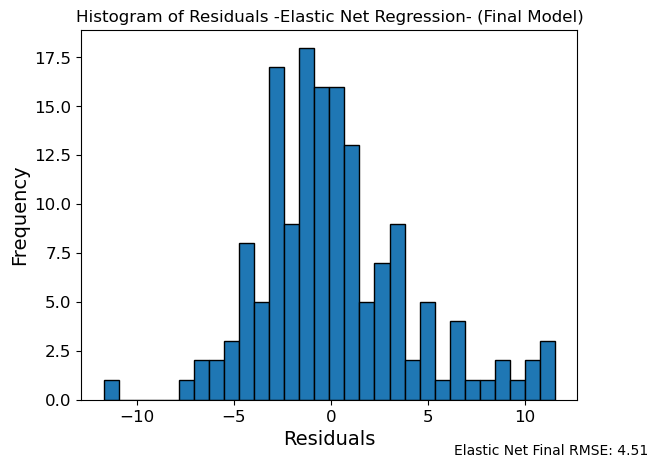

In [272]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Elastic Net Regression- (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Elastic Net Final RMSE: {_ElasticNet_final_rmse:.2f}")

plt.show()



## f. Polynomial Regression with Regularisation

In [239]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a Polynomial Regression model with Ridge regularization
poly_ridge_reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=0.1, fit_intercept=True, random_state=42)
)

# Fit the model to   training data
poly_ridge_reg.fit(train_dataset_prepared, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=0.1, random_state=42))])

In [240]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a Polynomial Regression model with L2 regularization (Ridge) using SGDRegressor
poly_sgd_reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    SGDRegressor(penalty="l2", alpha=0.1, max_iter=1000, tol=1e-4, random_state=42)
)

# Fit the model to   training data
poly_sgd_reg.fit(train_dataset_prepared, y_train.ravel())

# Generate predictions on the  training data
poly_sgd_reg.predict(train_dataset_prepared)


array([25.33497824, 18.6258618 , 31.17479601, 35.37758612, 11.96499369,
       33.17319334, 30.70302342, 34.1774623 , 19.94155093, 13.37043913,
       18.4831593 , 13.03414454, 29.42469353, 32.77440221, 31.46351978,
       13.92287003,  7.44705611, 30.13158179, 12.84700151, 32.74885666,
       14.33941536, 29.69485606, 13.14171605, 16.91297531, 32.04788057,
       30.00321743,  8.94639604, 15.7006372 , 33.61701067, 16.10492175,
       33.59930682, 16.64309213, 28.87204866, 14.11585274, 17.6300837 ,
       30.68626984, 24.3241597 , 19.38976082, 38.22259998, 12.37419323,
       31.51214761, 31.90700895, 27.38505976, 13.56669287, 30.21873283,
       10.20044285, 17.45568676, 31.7971469 , 19.33038548, 30.84386055,
        9.63933504, 31.69403502, 25.23768389, 30.63241897, 27.29482654,
       12.49825688, 30.16704418, 11.27766168, 15.4229716 , 35.69672773,
        4.58255007, 13.68550748, 28.20553406, 27.75821904, 32.76925084,
       14.53441014, 23.11151402, 12.37828302, 26.93819361, 32.85

### Transforming dataset using PolynomialFeatures

In [241]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the degree of the polynomial
degree = 2

# Create a pipeline with PolynomialFeatures and LinearRegression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to   training data
poly_reg.fit(train_dataset_prepared, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### Test set to evaluation Polynomial Regression with regularisation

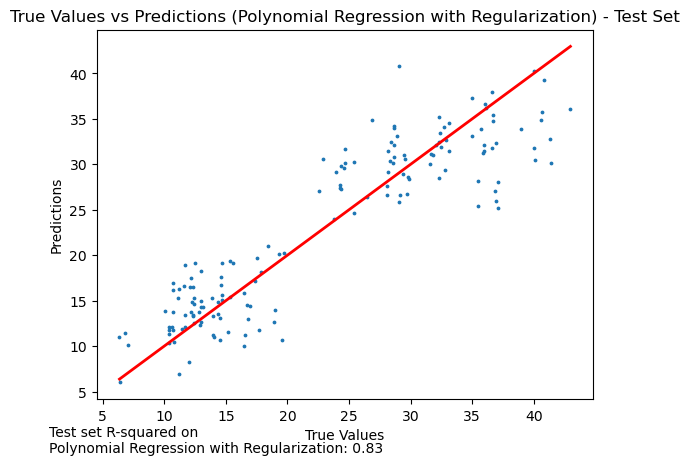

In [242]:
# Prepare the test set
test_predictions = poly_reg.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = poly_reg.score(test_dataset_prepared, y_test)

# Create a scatter plot comparing true values with predicted values for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Polynomial Regression with Regularization) - Test Set")

# Add a reference line for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Print the R-squared value (test set accuracy) at the bottom of the plot
plt.text(0.05, 0, f"Test set R-squared on\nPolynomial Regression with Regularization: {test_accuracy:.2f}", fontsize=10, transform=plt.gcf().transFigure)

plt.show()


### Performance Evaluation using R-Squared- Polynomial Regression

In [243]:
from sklearn.metrics import r2_score

# R-squared scores
train_r2 = r2_score(y_train, poly_reg.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.2f}")
print(f"Test set R-squared: {test_r2:.2f}")

Training set R-squared: 0.85
Test set R-squared: 0.83


### Mean Square Error on Polynomial Regression

In [244]:
from sklearn.metrics import mean_absolute_error


train_mae = mean_absolute_error(y_train, poly_ridge_reg.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, poly_ridge_reg.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 2.979153262892304
Test MAE: 3.2606539163961035
Training RMSE: 3.8519731916857247
Test RMSE: 4.2578107099383375


### Polynomial Regression Cross  Validation

In [245]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

### Polynomial Regression- Cross Validation

In [246]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create a Polynomial Regression model with L2 regularization (Ridge)
degree = 2
poly_ridge_reg = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    StandardScaler(),
    Ridge(alpha=1, random_state=42)
)

# Fit the model to the training data
poly_ridge_reg.fit(train_dataset_prepared, y_train.ravel())

# Cross-validation for Ridge Regression with polynomial features
ridge_scores = cross_val_score(poly_ridge_reg, train_dataset_prepared, y_train.ravel(),
                               n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)

display_scores(ridge_rmse_scores)


Scores: [3.55008106 4.11859401 3.9341674  4.13308583 4.82878645 4.19734024
 3.89896795 4.4181787  4.70758633 3.52095688]
Mean: 4.13077448695251
Standard deviation: 0.4133508770246564


In [247]:
# Define the parameter grid for Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define the parameter grid for Ridge Regression
param_grid = [
    {
        'polynomialfeatures__degree': [1, 2, 3, 4],
        'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'ridge__tol': [1e-3, 1e-4, 1e-5],
    }
]

# Create the Polynomial Regression model with Ridge regularization
degree = 2
poly_ridge_reg = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    StandardScaler(),
    Ridge(random_state=42)
)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(poly_ridge_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train.ravel())

# Create the Polynomial Regression model with Ridge regularization
poly_ridge_reg = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    StandardScaler(),
    Ridge(random_state=42)
)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(poly_ridge_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train.ravel())


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'polynomialfeatures__degree': [1, 2, 3, 4],
                          'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'ridge__tol': [0.001, 0.0001, 1e-05]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [248]:
grid_search.best_params_

{'polynomialfeatures__degree': 3, 'ridge__alpha': 100, 'ridge__tol': 0.001}

In [249]:
grid_search.best_estimator_

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=100, random_state=42, tol=0.001))])

In [250]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.593999247722915 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.001, 'ridge__tol': 0.001}
4.593999247722915 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.001, 'ridge__tol': 0.0001}
4.593999247722915 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.001, 'ridge__tol': 1e-05}
4.593996647514242 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.01, 'ridge__tol': 0.001}
4.593996647514242 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.01, 'ridge__tol': 0.0001}
4.593996647514242 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.01, 'ridge__tol': 1e-05}
4.593970933948619 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1, 'ridge__tol': 0.001}
4.593970933948619 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1, 'ridge__tol': 0.0001}
4.593970933948619 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1, 'ridge__tol': 1e-05}
4.593742312063812 {'polynomialfeatures__degree': 1, 'ridge__alpha': 1, 'ridge__tol': 0.001}
4.593742312063812 {'polynomialfeatures__degree': 1

In [251]:
# here are the cross validation results in full as a dataframe

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,param_ridge__alpha,param_ridge__tol,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004937,0.002131,0.001302,0.000386,1,0.001,0.001,"{'polynomialfeatures__degree': 1, 'ridge__alph...",-19.979018,-20.128035,...,-21.104829,1.427524,49,-20.506665,-20.298908,-19.346916,-20.235807,-20.186973,-20.115054,0.399237
1,0.003555,0.000124,0.001075,0.000086,1,0.001,0.0001,"{'polynomialfeatures__degree': 1, 'ridge__alph...",-19.979018,-20.128035,...,-21.104829,1.427524,49,-20.506665,-20.298908,-19.346916,-20.235807,-20.186973,-20.115054,0.399237
2,0.003490,0.000392,0.001028,0.000135,1,0.001,0.00001,"{'polynomialfeatures__degree': 1, 'ridge__alph...",-19.979018,-20.128035,...,-21.104829,1.427524,49,-20.506665,-20.298908,-19.346916,-20.235807,-20.186973,-20.115054,0.399237
3,0.010696,0.014255,0.002410,0.002228,1,0.01,0.001,"{'polynomialfeatures__degree': 1, 'ridge__alph...",-19.979238,-20.128006,...,-21.104805,1.427550,46,-20.506665,-20.298908,-19.346916,-20.235807,-20.186973,-20.115054,0.399237
4,0.003117,0.000026,0.001275,0.000348,1,0.01,0.0001,"{'polynomialfeatures__degree': 1, 'ridge__alph...",-19.979238,-20.128006,...,-21.104805,1.427550,46,-20.506665,-20.298908,-19.346916,-20.235807,-20.186973,-20.115054,0.399237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.048905,0.004933,0.003542,0.001296,4,10,0.0001,"{'polynomialfeatures__degree': 4, 'ridge__alph...",-29.286666,-22.363182,...,-21.347114,4.427575,55,-5.024624,-4.761598,-5.180122,-4.985454,-5.152548,-5.020869,0.149125
68,0.043331,0.002301,0.003078,0.000218,4,10,0.00001,"{'polynomialfeatures__degree': 4, 'ridge__alph...",-29.286666,-22.363182,...,-21.347114,4.427575,55,-5.024624,-4.761598,-5.180122,-4.985454,-5.152548,-5.020869,0.149125
69,0.042166,0.002798,0.003890,0.000774,4,100,0.001,"{'polynomialfeatures__degree': 4, 'ridge__alph...",-19.568154,-14.614854,...,-17.003211,1.812622,4,-8.631881,-8.616190,-8.772376,-8.281526,-8.705621,-8.601519,0.169448
70,0.054450,0.012753,0.010559,0.012009,4,100,0.0001,"{'polynomialfeatures__degree': 4, 'ridge__alph...",-19.568154,-14.614854,...,-17.003211,1.812622,4,-8.631881,-8.616190,-8.772376,-8.281526,-8.705621,-8.601519,0.169448


In [252]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_Polynomial_final_rmse = np.sqrt(final_mse)

In [253]:
_Polynomial_final_rmse

3.8999835732354535

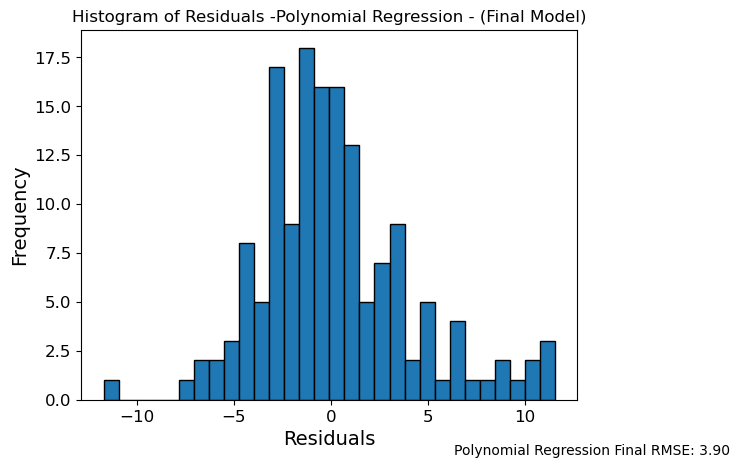

In [266]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Polynomial Regression - (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Polynomial Regression Final RMSE: {_Polynomial_final_rmse:.2f}")

plt.show()




## f. Neural Network

setup

In [255]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2023-03-19 17:45:37.967561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Perceptron

In [256]:
import numpy as np
from sklearn.linear_model import Perceptron

# Assuming train_dataset_prepared and dataset_labels are already defined as   dataset's features and target values
X = train_dataset_prepared
y_continuous = dataset_labels

# Discretize the target variable using the median value
y_median = np.median(y_continuous)
y_binary = (y_continuous > y_median).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y_binary)

# Make predictions using the same dataset used for training
y_pred = per_clf.predict(X)


In [257]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [258]:
# Defining and plotting some of the most common actvation functions 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


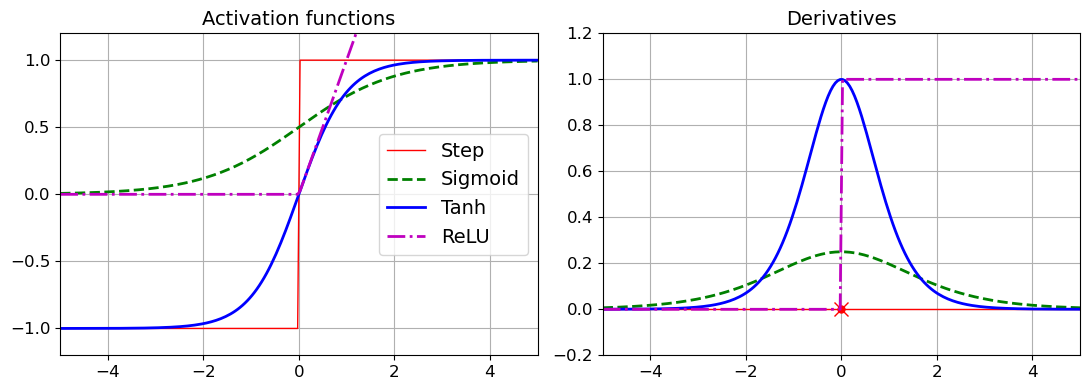

In [259]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [260]:
from sklearn.neural_network import MLPRegressor

# Define the neural network model
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50),
                       activation='relu',
                       solver='adam',
                       alpha=0.001,
                       batch_size='auto',
                       learning_rate='constant',
                       learning_rate_init=0.001,
                       max_iter=2000,
                       random_state=42)

# Train the neural network model
mlp_reg.fit(train_data_poly, y_train)

# Make predictions
prediction = mlp_reg.predict(X_new_poly)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, prediction, s=3, c='dodgerblue', label='Predictions')

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (MLPRegressor with Polynomial Features)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()


NameError: name 'train_data_poly' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_train, prediction))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the R-squared
r2 = r2_score(y_train, prediction)
print("R-squared:", r2)


# IV. Model selection

In [275]:
rmse_values = {
    "Linear Regression": _LinReg_final_rmse,
    "Ridge Regression": _RidgeReg_final_rmse,
    "Lasso Regression": _LassoReg_final_rmse,
    "Elastic Net": _ElasticNet_final_rmse,
    "Polynomial Regression": _Polynomial_final_rmse
}

sorted_rmse_values = sorted(rmse_values.items(), key=lambda x: x[1])

for model, rmse in sorted_rmse_values:
    print(f"{model} RMSE: {rmse:.2f}")

best_model = sorted_rmse_values[0][0]
best_rmse = sorted_rmse_values[0][1]

print(f"\nThe best model is {best_model} with an RMSE of {best_rmse:.2f}")


Polynomial Regression RMSE: 3.90
Linear Regression RMSE: 4.47
Ridge Regression RMSE: 4.47
Lasso Regression RMSE: 4.51
Elastic Net RMSE: 4.51

The best model is Polynomial Regression with an RMSE of 3.90


# V. Evaluating the 2 best models on test set